In [3]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [4]:
df = pd.read_csv("DDM - A3.csv")
df.head()

,Week,P - Retail Unit Price,P - Retail Unit Sales,P - Retail Sales,P - Retail Unit Cost,1 - Retail Unit Price,1 - Retail Unit Sales,1 - Retail Sales,1 - Retail Unit Cost,1 - MFU Unit Cost,P - Case Sales,P - Retail Case Cost,1 - Retail Case Sales,1 - Retail Case Cost,1 - MFU Case Cost
0,1,2.39,4395,10504,1.89,2.69,3127,8412,2.23,1.23,183,45.31,130,53.58,29.47
1,2,2.39,3965,9475,1.89,2.69,2637,7094,2.23,1.23,165,45.31,110,53.58,29.47
2,3,2.39,3598,8599,1.89,2.69,3067,8251,2.23,1.23,150,45.31,128,53.58,29.47
3,4,2.39,4048,9674,1.89,2.69,3358,9032,2.23,1.23,169,45.31,140,53.58,29.47
4,5,2.39,3768,9006,1.89,2.69,2894,7785,2.23,1.23,157,45.31,121,53.58,29.47


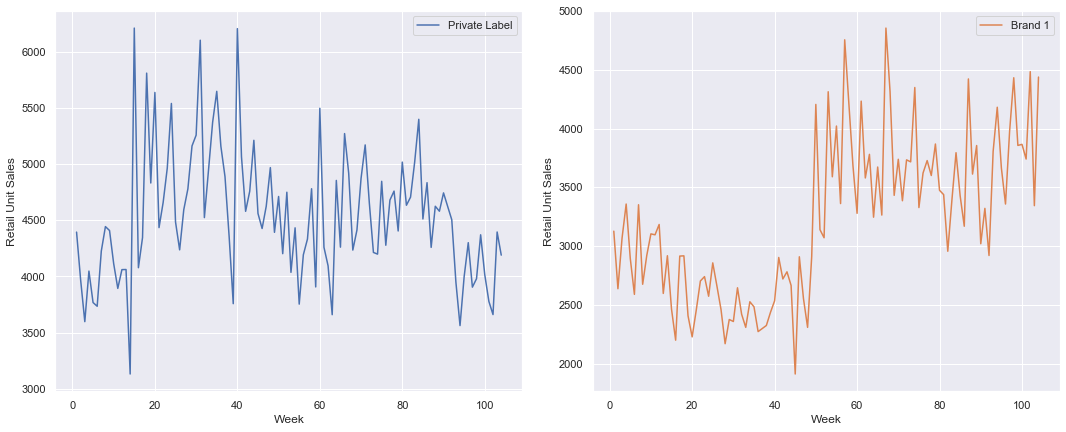

In [41]:
#1. a) Plot the sales data for the two brands separately, over time. 

sns.set()
fig, ax = plt.subplots(1, 2, figsize=(18,7))
fig.subplots_adjust(wspace=0.15)
ax[0].plot(df["Week"], df["P - Retail Unit Sales"], label="Private Label")  
ax[0].legend(loc='best')
ax[1].plot(df["Week"], df["1 - Retail Unit Sales"], "C1", label="Brand 1") 
ax[1].legend(loc='best')
for a in ax:
    a.set_xlabel("Week")
    a.set_ylabel("Retail Unit Sales")

In [18]:
# b) Compute the (simple) average retail price per unit of each brand. 
#    Compute the $ price gap between the brands at the average prices.

print("Private Label: ", df["P - Retail Unit Price"].mean())
print("Brand 1: ", df["1 - Retail Unit Price"].mean())
print("Price gap: ", abs(df["P - Retail Unit Price"].mean()-df["1 - Retail Unit Price"].mean()))

Private Label:  2.15346153846154
Brand 1:  2.6111538461538473
Price gap:  0.4576923076923074


In [7]:
# c) Compute the average weekly % retail margin of each brand.  

df["P - Retail Margin"] = (df["P - Retail Unit Price"]-df["P - Retail Unit Cost"])/df["P - Retail Unit Price"]
df["1 - Retail Margin"] = (df["1 - Retail Unit Price"]-df["1 - Retail Unit Cost"])/df["1 - Retail Unit Price"]
print("Private Label: ", df["P - Retail Margin"].mean())
print("Brand 1: ", df["1 - Retail Margin"].mean())

Private Label:  0.23076574734203542
Brand 1:  0.17166760831382166


In [8]:
# d) Report the average weekly unit sales of each brand. 

print("Private Label: ", df["P - Retail Unit Sales"].mean())
print("Brand 1: ", df["1 - Retail Unit Sales"].mean())

Private Label:  4544.817307692308
Brand 1:  3220.855769230769


In [9]:
# e) Report the average weekly market share of the two brands (within this retail account) based on unit sales. 
#    Assume the category consists of these two brands only.

df["P - Unit Mkt Share"] = df["P - Retail Unit Sales"]/(df["P - Retail Unit Sales"]+df["1 - Retail Unit Sales"])
df["1 - Unit Mkt Share"] = 1 - df["P - Unit Mkt Share"]
print("Private Label: ", df["P - Unit Mkt Share"].mean())
print("Brand 1: ", df["1 - Unit Mkt Share"].mean())

Private Label:  0.5868842246372873
Brand 1:  0.41311577536271255


In [43]:
# f) Compute the average weekly profits (in $) of the retailer and the manufacturer. 
#    Remember that the retailer gets profits from selling brand 1 and the private label.

df["R - Profit"] = df["P - Retail Margin"]*df["P - Retail Sales"]+df["1 - Retail Margin"]*df["1 - Retail Sales"]
df["MFU - Profit"] = df["1 - Retail Unit Sales"]*(df["1 - Retail Unit Cost"]-df["1 - MFU Unit Cost"])
print("Retailer: ", df["R - Profit"].mean())
print("Manufacturer: ", df["MFU - Profit"].mean())

Retailer:  3690.805393548122
Manufacturer:  3142.043557692308


In [11]:
#2. Determine the variables that should be included in the marketing mix models (one model each for brand 1 and the private label).  
#   Estimate the models. Use the semi-log (or exponential) form of the model. Show the regression outputs. 
#   Note: DO NOT include a trend variable in the model. DO NOT include or control for seasonality in the model.

#Varibles: Retail Price (P&1)
df["P - ln(Retail Unit Sales)"] = np.log(df["P - Retail Unit Sales"])
df["1 - ln(Retail Unit Sales)"] = np.log(df["1 - Retail Unit Sales"])

variables = df[["P - Retail Unit Price", "1 - Retail Unit Price"]]

Y_P = df["P - ln(Retail Unit Sales)"]
X_P = sm.add_constant(variables)
OLS_model_P = sm.OLS(Y_P,X_P)
result_P = OLS_model_P.fit()

Y_1 = df["1 - ln(Retail Unit Sales)"]
X_1 = sm.add_constant(variables)
OLS_model_1 = sm.OLS(Y_1,X_1)
result_1 = OLS_model_1.fit()

print(result_P.summary())
print(result_1.summary())

                                OLS Regression Results                               
Dep. Variable:     P - ln(Retail Unit Sales)   R-squared:                       0.413
Model:                                   OLS   Adj. R-squared:                  0.402
Method:                        Least Squares   F-statistic:                     35.60
Date:                       Fri, 15 Nov 2019   Prob (F-statistic):           1.99e-12
Time:                               10:12:35   Log-Likelihood:                 96.261
No. Observations:                        104   AIC:                            -186.5
Df Residuals:                            101   BIC:                            -178.6
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

/Users/kystanleylin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


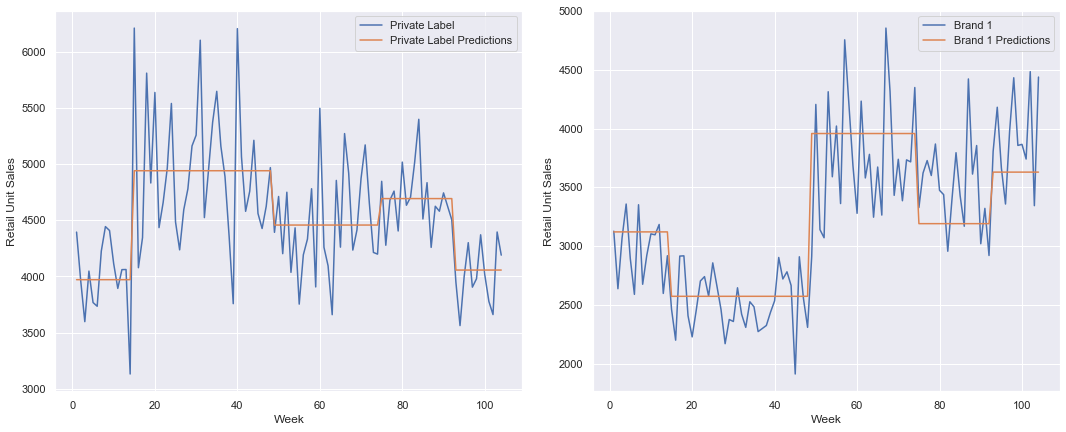

In [12]:
#3. Assess the validity of the models based on (i) face validity of the estimated coefficients, 
#   (ii) statistical significance of the overall models, and 
#   (iii) statistical significance of estimated coefficients.  
#   Plot the predicted versus actual sales (within the estimation sample) for each brand and for the category. 
#   You should have three graphs in total, one each for brand 1, private label, and the category. 
#   Horizontal axis is time, vertical axis is sales.   Category sales is sum of sales of the two brands.

Correction_P = np.exp(0.5*result_P.mse_resid)
Correction_1 = np.exp(0.5*result_1.mse_resid)

Predictions_P = np.exp(result_P.predict(X_P))*Correction_P
Predictions_1 = np.exp(result_1.predict(X_1))*Correction_1

fig, ax = plt.subplots(1, 2, figsize=(18,7))
fig.subplots_adjust(wspace=0.15)
ax[0].plot(df["Week"], df["P - Retail Unit Sales"], label="Private Label")
ax[0].plot(df["Week"], Predictions_P, label="Private Label Predictions")
ax[0].legend(loc='best')
ax[1].plot(df["Week"], df["1 - Retail Unit Sales"], label="Brand 1") 
ax[1].plot(df["Week"], Predictions_1, label="Brand 1 Predictions") 
ax[1].legend(loc='best')
for a in ax:
    a.set_xlabel("Week")
    a.set_ylabel("Retail Unit Sales")

Text(0, 0.5, 'Retail Unit Sales')

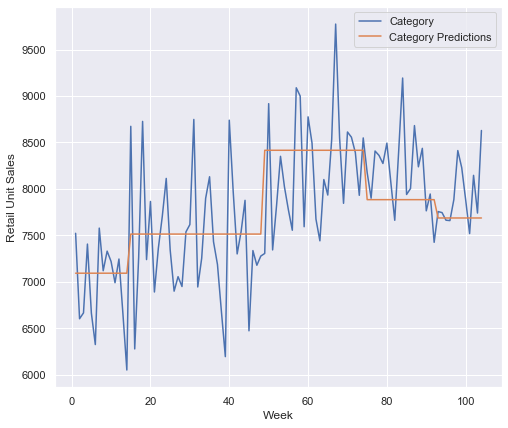

In [13]:
plt.figure(figsize=(8, 7))
plt.plot(df["Week"], df["P - Retail Unit Sales"]+df["1 - Retail Unit Sales"], label="Category")
plt.plot(df["Week"], Predictions_P+Predictions_1, label="Category Predictions")
plt.legend(loc="best")
plt.xlabel("Week")
plt.ylabel("Retail Unit Sales")

In [42]:
#4. In this question you will determine the optimal selling price of the manufacturer using Excel or calculus for an average week. 
#   Make reasonable assumptions about manufacturer costs and state them. 
#   Do not forget that the retailer sets the retail price.  
#   Assume that the retailer has margin goals that serve as norms. 
#   Please state your assumptions about the retailer clearly. 
#   With regard to the competitor’s price, consider the following two scenarios 
#   (these reflect our assumptions about how the retailer will price the private label) 
#   and provide the optimal selling price of the manufacturer under each scenario separately:
#     a) Assume that the private label’s retail price is fixed at the average level in the data.  
#     b) Assume that the private label’s retail price is always 35 cents below the retail price of brand 1.
#   Please make sure that the steps you followed in your analysis are clear, otherwise we cannot give partial credit.



# Assumptions 1. Retailer margin is fixed at the average values calculated in question 1 c) 
#             2. Manufacturer costs is fixed at the average value of the data, df["1 - MFU Unit Cost"].mean()

# a) Assume that the private label’s retail price is fixed at the average level in the data.  
print("Coef for Private Label:")
print(result_P.params)
print()
print("Coef for Brand 1:")
print(result_1.params)
print()
print("Manufacturer costs:", df["1 - MFU Unit Cost"].mean())
print()
print("P_MSE: ", Correction_P)
print("1_MSE: ", Correction_1)
print()
print("Retailer's average cost of Private Label: ", df["P - Retail Unit Cost"].mean())

Coef for Private Label:
const                    8.637727
P - Retail Unit Price   -0.728179
1 - Retail Unit Price    0.514799
dtype: float64

Coef for Brand 1:
const                    12.294845
P - Retail Unit Price     0.644146
1 - Retail Unit Price    -2.154689
dtype: float64

Manufacturer costs: 1.1846153846153842

P_MSE:  1.0047455246026389
1_MSE:  1.007648352386693

Retailer's average cost of Private Label:  1.6580769230769268
